In [18]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans

In [39]:
df = pd.read_csv('cleand preprocessed.csv')
df.head(3)

,구분,악궁구조,나이,성별,비뚠니,1년이내스케일링,사랑니,시린니,구취,치아흔들림,...,추천칫솔,추천치약,진단년,진단월,진단일,진단시,진단요일,나쁜습관,바뀔 수 없는 구강구조,치아 상황
0,0,1,22,0,0,1,0,1,0,0,...,클린디 초극세모 칫솔,클린디 달짝 치약 100g 시린이,2022,5,2,10,0,0,0,2
1,0,1,22,0,0,1,0,0,0,0,...,클린디 기능모 칫솔,클린디 살짝 치약 100g 잇몸,2022,5,2,10,0,0,0,0
2,0,1,33,1,0,0,0,1,0,1,...,클린디 초극세모 칫솔,클린디 달짝 치약 100g 시린이,2022,5,2,9,0,0,0,3


In [40]:
# 3가지 변수 대상
cleand = df[['나쁜습관','바뀔 수 없는 구강구조']]
cleand.head(3)

,나쁜습관,바뀔 수 없는 구강구조
0,0,0
1,0,0
2,0,0


In [41]:
#정규화
scaler = MinMaxScaler()
cleand_scale = scaler.fit_transform(cleand)

In [42]:
k = 3

# 그룹 수, random_state 설정
model = KMeans(n_clusters = k, random_state = 10)

# 정규화된 데이터에 학습
model.fit(cleand_scale)

# 클러스터링 결과 각 데이터가 몇 번째 그룹에 속하는지 저장
df['cluster'] = model.fit_predict(cleand_scale)

C:\Users\User\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 45208 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\User\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 49244 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\User\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 49845 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\User\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 44288 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\User\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 48148 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\User\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 45076 missing from current

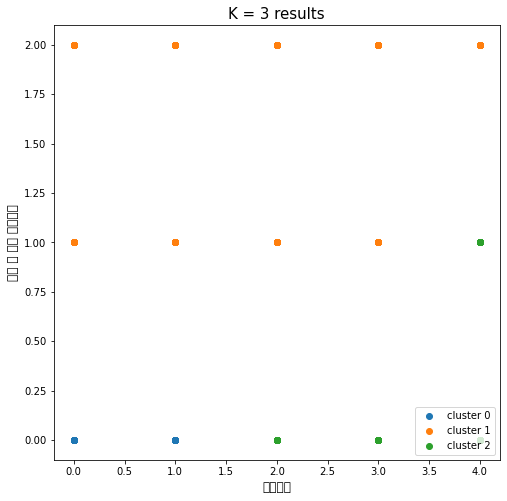

In [45]:
import matplotlib.pyplot as plt

plt.figure(figsize = (8, 8))

for i in range(k):
    plt.scatter(df.loc[df['cluster'] == i, '나쁜습관'], df.loc[df['cluster'] == i, '바뀔 수 없는 구강구조'], 
                label = 'cluster ' + str(i))

plt.legend()
plt.title('K = %d results'%k , size = 15)
plt.xlabel('나쁜습관', size = 12)
plt.ylabel('바뀔 수 없는 구강구조', size = 12)
plt.show()

In [44]:
from yellowbrick.cluster import KElbowVisualizer

model = KMeans()
visualizer = KElbowVisualizer(model, k=(1,10))
visualizer.fit(data_scale)

ModuleNotFoundError: No module named 'yellowbrick'